In [119]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from scipy.stats import ttest_ind
%matplotlib inline

In [120]:
zomato = pd.read_csv('zomato.csv')

here we find the data avilable in dataset

In [121]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [122]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


here we remove all unwanted data from the dataset

In [123]:
zomato = zomato.iloc[:,np.r_[2:7,9:14,15:17]]

In [124]:
set(zomato)

{'approx_cost(for two people)',
 'book_table',
 'cuisines',
 'dish_liked',
 'listed_in(city)',
 'listed_in(type)',
 'name',
 'online_order',
 'rate',
 'rest_type',
 'reviews_list',
 'votes'}

Now lets extract just the ratings of the restaurants from the reviews_list column which will be used later to fill in the missing values in rate column:

In [125]:
avg = []
for i in range(len(zomato)):
    l = list(map(int, re.findall(r'%s(\d+)' % 'Rated ',zomato['reviews_list'][i])))
    if len(l) >0:
        avg.append(round(sum(l)/len(l), 2))
    else:
        avg.append(0)   

In [126]:
zomato['review_rates'] = pd.Series(avg)

Now lets make the rate column more appropriate for Analysis by converting it to float type and removing '/5' from the rating"

In [127]:
rate = []
for index, data in enumerate(zomato.rate):
    if (data is not np.nan) & (data != 'NEW') & (data != '-'):
        rate.append(float(data.split('/')[0]))
    else:
        rate.append(data)
        
zomato['rate'] = pd.Series(rate)        

Also Renaming our column names to more appropriate names:

In [128]:
zomato.rename(columns={'cuisines' : 'Cuisine', 'listed_in(city)': 'Locality', 'listed_in(type)' : 'Listed_Type', 'approx_cost(for two people)': 'Approx_Cost', 'name': 'Name', 'rest_type':'Restaurant_Type', 'rate' : 'Rating', 'votes' : 'Total_Votes', 'online_order': 'Online_Order','book_table':'Table_Booking', 'dish_liked' : 'Dishes_Liked' }, inplace = True)
zomato.columns

Index(['Name', 'Online_Order', 'Table_Booking', 'Rating', 'Total_Votes',
       'Restaurant_Type', 'Dishes_Liked', 'Cuisine', 'Approx_Cost',
       'reviews_list', 'Listed_Type', 'Locality', 'review_rates'],
      dtype='object')

In [129]:
zomato.drop(zomato[(zomato['review_rates'] == 0) & (zomato['Rating'].isna())].index, inplace=True)
zomato['Rating'] = np.where(zomato.Rating.isna(), zomato.review_rates, zomato.Rating)
zomato['Rating'] = np.where(zomato['Rating'] == '-', zomato.review_rates, zomato.Rating)
zomato.head()

,Name,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,reviews_list,Listed_Type,Locality,review_rates
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.08
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3.57
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.15
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.51
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,4.00


In [130]:
zomato_New = zomato[zomato['Rating'] == 'NEW']
zomato.drop(zomato.Rating[zomato.Rating == 'NEW'].index, inplace=True)

In [131]:
print("Approx_Cost column has {} Nan values and Cuisine column has {} Nan values, we need to drop these.".format(sum(zomato.Approx_Cost.isna()), sum(zomato.Cuisine.isna())))


Approx_Cost column has 300 Nan values and Cuisine column has 17 Nan values, we need to drop these.


In [132]:
zomato.dropna(subset=['Approx_Cost', 'Cuisine'], inplace = True)
zomato.drop(['reviews_list','review_rates'], axis =1, inplace=True)
zomato.head()

,Name,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,Listed_Type,Locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [133]:
zomato['Rating'] = zomato['Rating'].apply(pd.to_numeric)
zomato['Approx_Cost'].replace(',', '',regex=True, inplace=True)
zomato['Approx_Cost'] = zomato['Approx_Cost'].apply(pd.to_numeric)
zomato['Name'].replace({r'[^\x00-\x7F]+':''}, regex = True, inplace=True)
zomato.head()

,Name,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,Listed_Type,Locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [134]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43922 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             43922 non-null  object 
 1   Online_Order     43922 non-null  object 
 2   Table_Booking    43922 non-null  object 
 3   Rating           43922 non-null  float64
 4   Total_Votes      43922 non-null  int64  
 5   Restaurant_Type  43766 non-null  object 
 6   Dishes_Liked     23353 non-null  object 
 7   Cuisine          43922 non-null  object 
 8   Approx_Cost      43922 non-null  int64  
 9   Listed_Type      43922 non-null  object 
 10  Locality         43922 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.0+ MB


2. EDA - Visualization
Q) How many restaurants provide option of ordering online?

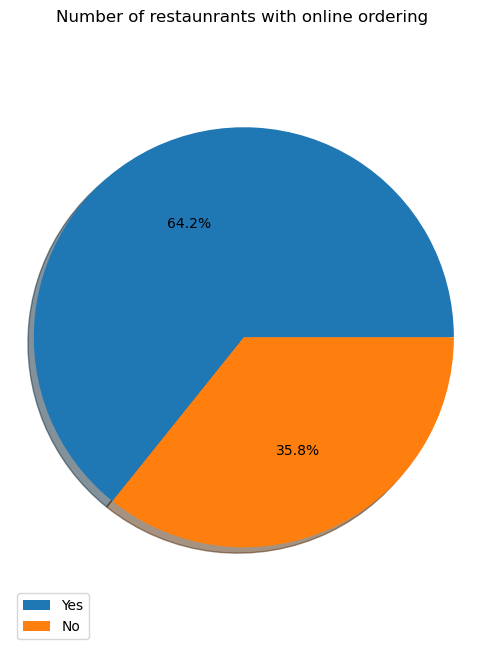

In [135]:
fig1, ax1 = plt.subplots(figsize=(6,8));
ax1.pie(zomato.Online_Order.value_counts().values, autopct = '%1.1f%%', shadow=True);
ax1.legend(zomato.Online_Order.value_counts().index,
          loc="lower left")
ax1.axis('equal');
ax1.set_title('Number of restaunrants with online ordering');

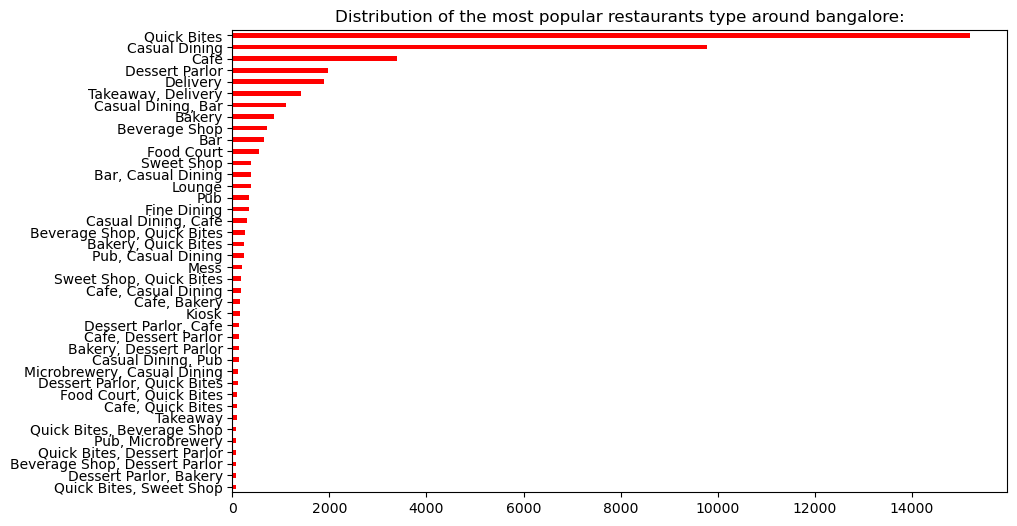

In [136]:
plt.figure(figsize=(10, 6))
zomato.Restaurant_Type.value_counts(ascending=True).tail(40).plot.barh(  width = 0.4,color = "red");

plt.title('Distribution of the most popular restaurants type around bangalore:');

<Figure size 1000x1000 with 0 Axes>

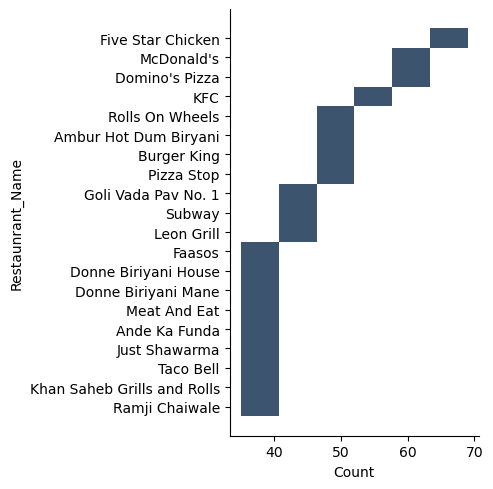

In [137]:
z1 = zomato[zomato['Restaurant_Type'] == 'Quick Bites']['Name'].value_counts().head(20).reset_index().rename(columns = {'index': 'Restaunrant_Name', 'Name':'Count'})
plt.figure(figsize=(10,10))
sns.displot(y= 'Restaunrant_Name', x = 'Count', data = z1);


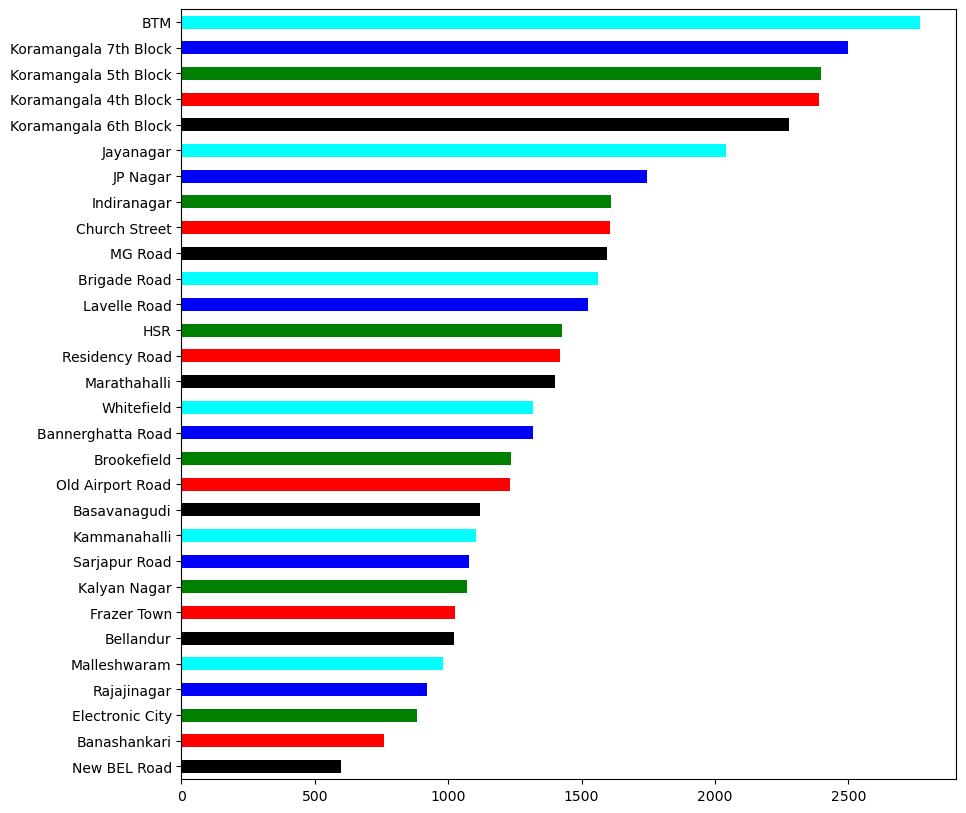

In [138]:
plt.figure(figsize=(10,10))
zomato.Locality.value_counts(ascending=True).plot.barh(  color=['black', 'red', 'green', 'blue', 'cyan']);

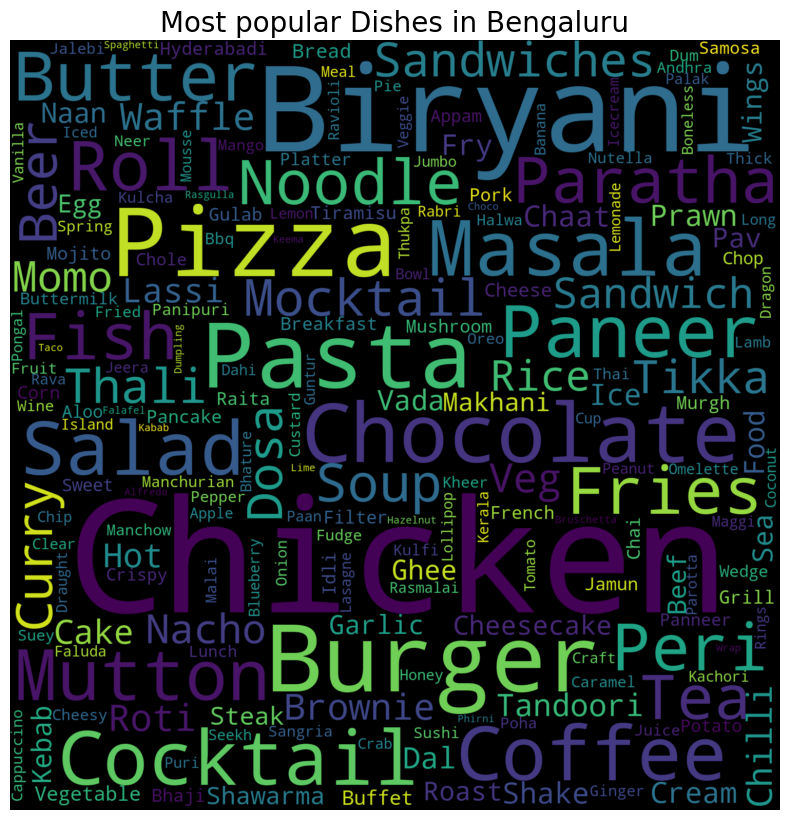

In [139]:
z = zomato['Dishes_Liked'].dropna()
c1 = ' '.join([text for text in z])
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black', collocations = False, width=1500, height=1500).generate(c1)
plt.imshow(wordcloud)
plt.title('Most popular Dishes in Bengaluru', size = 20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()




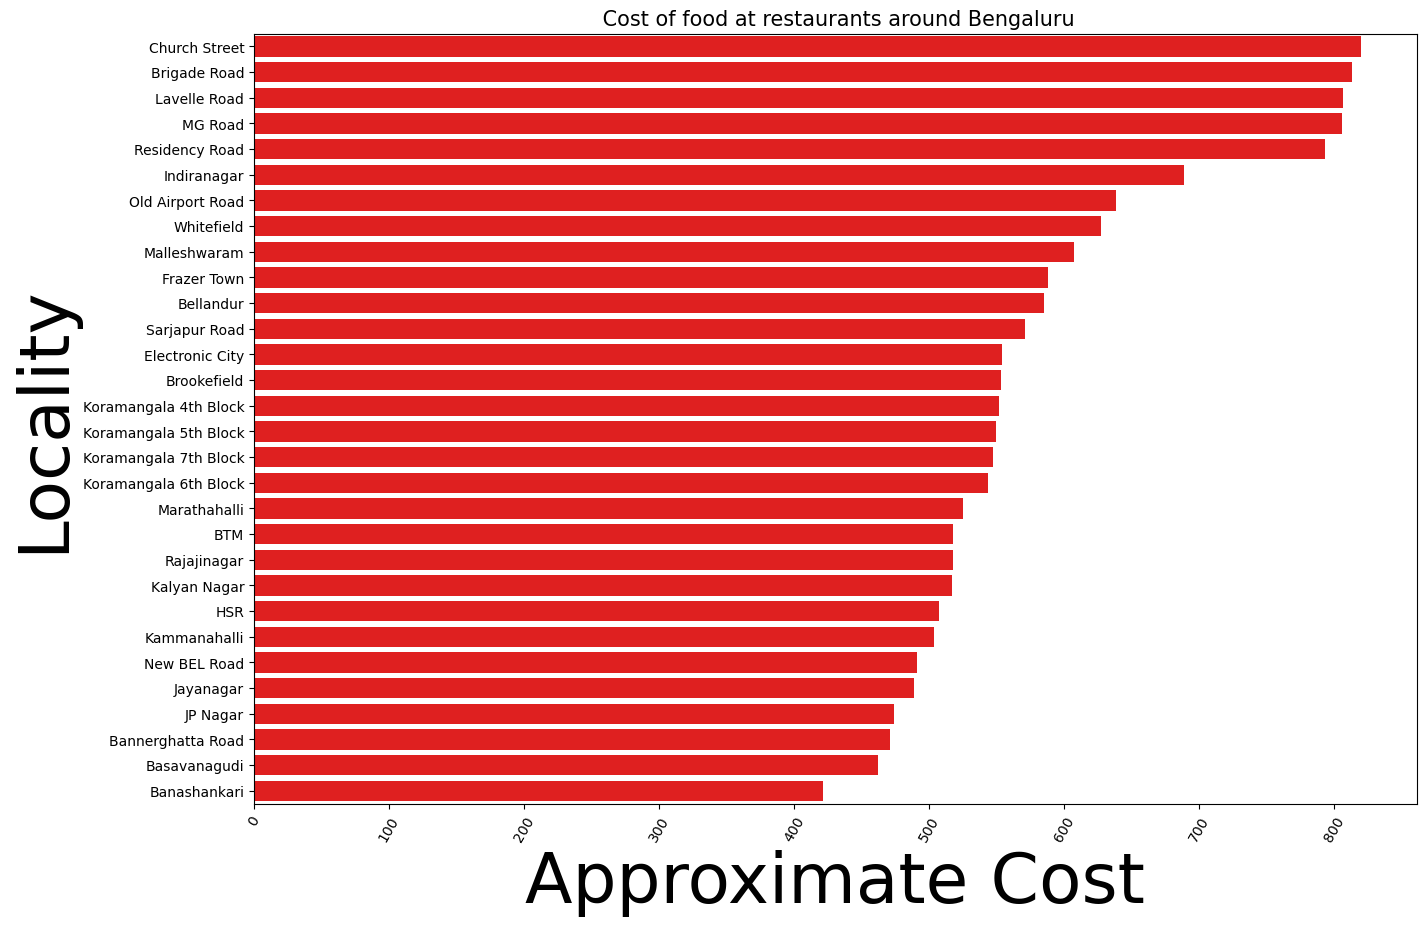

In [140]:
zly = zomato.groupby(['Locality'])['Approx_Cost'].agg(np.mean)
zly = pd.DataFrame(zly)
zly.reset_index(inplace=True)
zly.sort_values(['Approx_Cost'], ascending = False, inplace=True)
plt.figure(figsize=(15,10))
sns.barplot(y = 'Locality', x = 'Approx_Cost',color='red', data = zly);
plt.xticks(rotation = 60);
plt.xlabel('Approximate Cost', size = 50)
plt.ylabel('Locality', size = 50)
plt.title(' Cost of food at restaurants around Bengaluru', size = 15);

In [141]:
top_brands = zomato.Name.value_counts().head(7000).index
x = []
y = []
for tb in top_brands:
    x.append(zomato[zomato.Name == tb]['Rating'].mean())
    y.append(len(zomato[zomato.Name == tb]))

top_brands = pd.DataFrame(list(zip(x,y)))
top_brands.rename(columns = {0:'Avg_Rating', 1:'#OfBranches'}, inplace=True)
fig = px.scatter(top_brands, x="Avg_Rating", y="#OfBranches", trendline="ols")
fig.show()